Synthetisch Time Series - tägl. saisonal 
Von hier: https://towardsdatascience.com/creating-synthetic-time-series-data-67223ff08e34



# Seasonal Series4 (Sinus Seasonality / linear trend with one change / noise)

In [5]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [7]:
series = pd.date_range(start='2016-01-01', end='2021-12-31', freq='D')
df_season = pd.DataFrame(columns=['date', 'sin'])
df_season.date=series
df_season.sin = 1 * np.sin(0.01721420632 * df_season.index + 0) + 1

In [8]:
df_season.head()
#df_season.plot(y="Yearly", x="date", figsize=(16,6))

,date,sin
0,2016-01-01,1.000000
1,2016-01-02,1.017213
2,2016-01-03,1.034422
3,2016-01-04,1.051620
4,2016-01-05,1.068802


In [12]:
df_season['Yearly'] = df_season['sin']+df_event['event']
df_season.head()

,date,sin,Yearly
0,2016-01-01,1.000000,1.000000
1,2016-01-02,1.017213,1.017213
2,2016-01-03,1.034422,1.034422
3,2016-01-04,1.051620,1.051620
4,2016-01-05,1.068802,1.068802


## Daten normalisieren

In [13]:
df_season["YearlyN"] = (df_season["Yearly"] - df_season["Yearly"].min()) / (df_season["Yearly"].max() - df_season["Yearly"].min())
df_season.head()

,date,sin,Yearly,YearlyN
0,2016-01-01,1.000000,1.000000,0.561898
1,2016-01-02,1.017213,1.017213,0.564405
2,2016-01-03,1.034422,1.034422,0.566911
3,2016-01-04,1.051620,1.051620,0.569415
4,2016-01-05,1.068802,1.068802,0.571917


(17167.0, 17531.0)

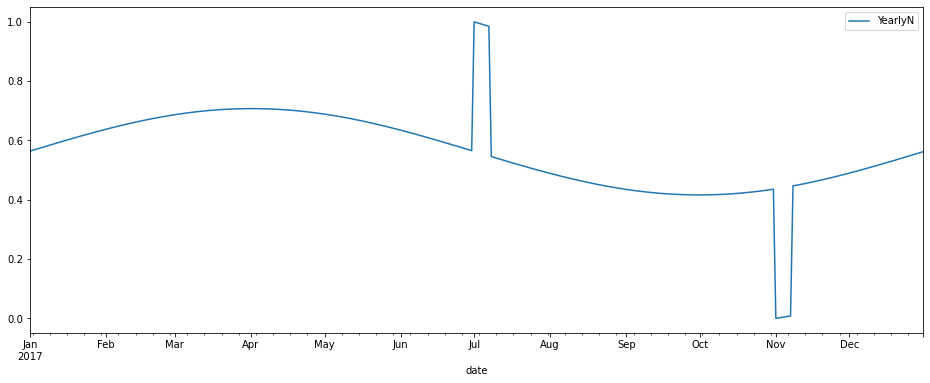

In [14]:
df_season.plot(y="YearlyN", x="date", figsize=(16,6))
plt.xlim('2017-01-01','2017-12-31')

# montly season series

<AxesSubplot:xlabel='date'>

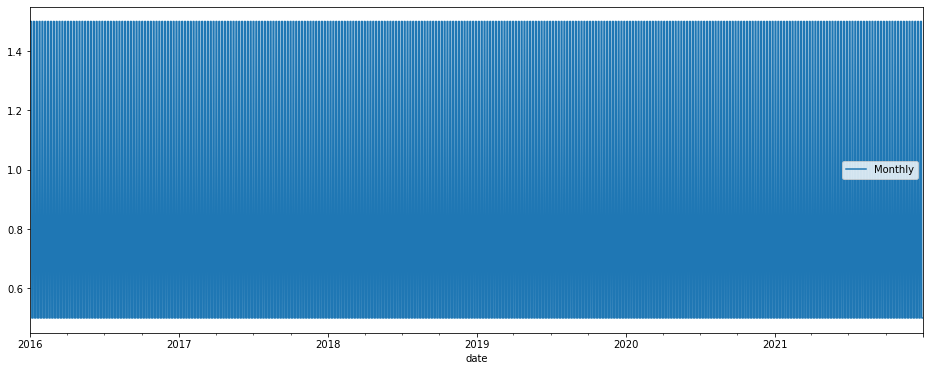

In [15]:
df_month = pd.DataFrame(columns=['date', 'Monthly'])
df_month.date=series
#df_month.sinM = 0.5 * np.sin(0.20600607564 * df_season.index + 0) + 1
df_month.Monthly = 0.5 * signal.square( 0.897597901 * df_season.index)+1
df_month.plot(y='Monthly', x="date", figsize=(16,6))

### normalisieren

In [16]:
df_month["MonthlyN"] = (df_month["Monthly"] - df_month["Monthly"].min()) / (df_month["Monthly"].max() - df_month["Monthly"].min())
df_month.head()

,date,Monthly,MonthlyN
0,2016-01-01,1.5,1.0
1,2016-01-02,1.5,1.0
2,2016-01-03,1.5,1.0
3,2016-01-04,1.5,1.0
4,2016-01-05,0.5,0.0


(17532.0, 17562.0)

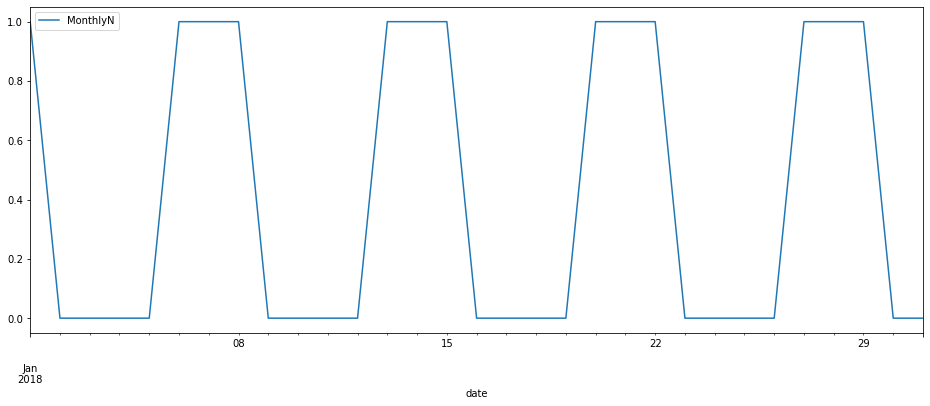

In [19]:
df_month.plot(y="MonthlyN", x="date", figsize=(16,6))
plt.xlim('2018-01-01','2018-01-31')

# Trend Series

### Daten erstellen Trend mit changepoint

In [20]:
df2 = pd.DataFrame(columns=['date', 'trend'])
df2.date=series
print(len(df2))
df2.head()

2192


,date,trend
0,2016-01-01,NaN
1,2016-01-02,NaN
2,2016-01-03,NaN
3,2016-01-04,NaN
4,2016-01-05,NaN


In [21]:
df2.loc[0:413,"trend"] = 0 + (-0.1*np.linspace(1,414,414)) +  (-0.01*(np.linspace(1,414,414)**2))
df2.loc[414:1013,"trend"]= -1755 + (0.5*np.linspace(1,600,600)) + (0.1*(np.linspace(1,600,600)**2))
df2.loc[1013:2192,"trend"] = 36179 + (1*np.linspace(1,1179,1179)) + (-0.05*(np.linspace(1,1179,1179)**2))
#df2.loc[814:1327,"trend"] = 328-0.4*np.linspace(1,514,514)
#df2.loc[1328:1828,"trend"] = 122+0.3*np.linspace(1,501,501)
#df2.loc[1829:2192,"trend"] = 272+0.8*np.linspace(1,363,363)
print(df2.head())
print(df2.tail())
print(df2.loc[0:413,"trend"].min())
print(df2.loc[414:1013,"trend"].max())
print(df2.loc[814:1327,"trend"].min())
print(df2.loc[1328:1828,"trend"].max())

        date trend
0 2016-01-01 -0.11
1 2016-01-02 -0.24
2 2016-01-03 -0.39
3 2016-01-04 -0.56
4 2016-01-05 -0.75
           date     trend
2187 2021-12-27 -31677.25
2188 2021-12-28  -31793.8
2189 2021-12-29 -31910.45
2190 2021-12-30  -32027.2
2191 2021-12-31 -32144.05
-1755.3600000000001
36179.95
14525.6
31502.2


### Daten Normalisieren

In [22]:
df2["trendN"] = (df2["trend"] - df2["trend"].min()) / (df2["trend"].max() - df2["trend"].min()) + 1
df2.head()

,date,trend,trendN
0,2016-01-01,-0.11,1.470435
1,2016-01-02,-0.24,1.470434
2,2016-01-03,-0.39,1.470431
3,2016-01-04,-0.56,1.470429
4,2016-01-05,-0.75,1.470426


<AxesSubplot:xlabel='date'>

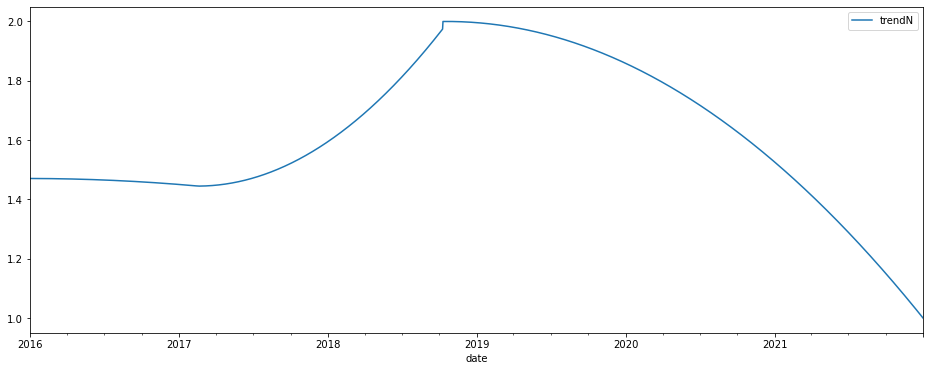

In [23]:
df2.plot(y="trendN", x="date", figsize=(16,6))

# Event Series

In [9]:
df_event = pd.DataFrame(columns=['date', 'event'])
df_event.date = series

In [10]:
def us_change(df_event):
    date = pd.to_datetime(df_event)
    if (date.month == 7 and date.day < 8):
        return 3
    if (date.month == 11 and date.day < 8):
        return -3
    else:
        return 0
    
df_event['event'] = df_event['date'].apply(us_change)

<AxesSubplot:xlabel='date'>

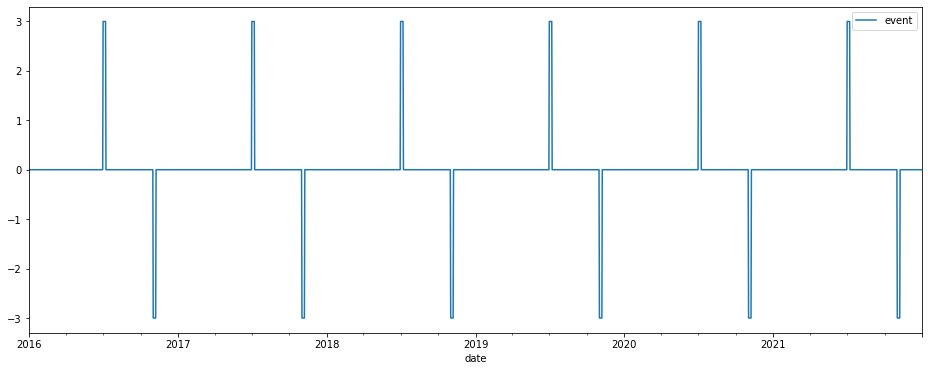

In [11]:
df_event.plot(y="event", x="date", figsize=(16,6))

In [16]:
#df_event['event'] = (df_event['event'] - df_event['event'].min()) / (df_event['event'].max() - df_event['event'].min())

In [17]:
#print(df_event[df_event['event']==-10])
#len(df_event[df_event['event']==-10])

# Outlier Series 

In [24]:
df_outlier = pd.DataFrame(columns=['date', 'outlier'])
df_outlier.date = series
df_outlier.outlier = 0

In [25]:
from random import seed
from random import randint
# seed random number generator
seed(1)

Value_pos = 4
value_min = -4

df_outlier.loc[randint(0,2192),'outlier'] = Value_pos
df_outlier.loc[randint(0,2192),'outlier'] = Value_pos
df_outlier.loc[randint(0,2192),'outlier'] = Value_pos
df_outlier.loc[randint(0,2192),'outlier'] = Value_pos
df_outlier.loc[randint(0,2192),'outlier'] = Value_pos


df_outlier.loc[randint(0,2192),'outlier'] = value_min
df_outlier.loc[randint(0,2192),'outlier'] = value_min
df_outlier.loc[randint(0,2192),'outlier'] = value_min
df_outlier.loc[randint(0,2192),'outlier'] = value_min
df_outlier.loc[randint(0,2192),'outlier'] = value_min


print(df_outlier[df_outlier['outlier']==Value_pos])
len(df_outlier[df_outlier['outlier']==Value_pos])
print(df_outlier[df_outlier['outlier']==value_min])
len(df_outlier[df_outlier['outlier']==value_min])

           date  outlier
258  2016-09-15        4
482  2017-04-27        4
550  2017-07-04        4
1044 2018-11-10        4
2029 2021-07-22        4
           date  outlier
384  2017-01-19       -4
859  2018-05-09       -4
1554 2020-04-03       -4
1841 2021-01-15       -4
1934 2021-04-18       -4


5

<AxesSubplot:xlabel='date'>

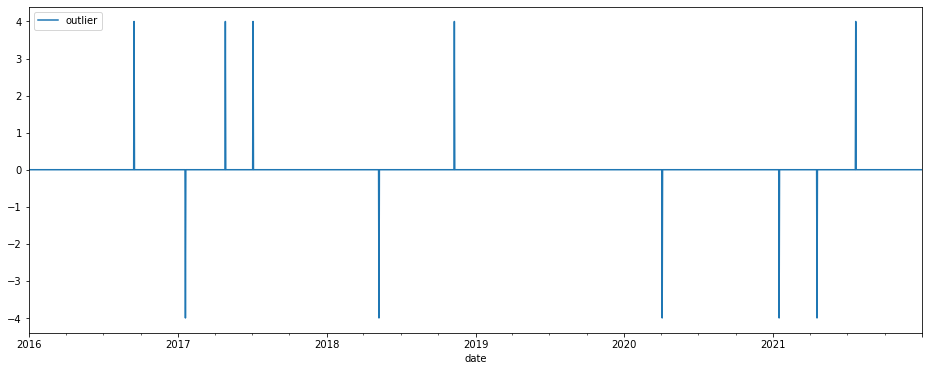

In [26]:
df_outlier.plot(y="outlier", x="date", figsize=(16,6))

# Noise Series

In [27]:
df_noise = pd.DataFrame(columns=['date', 'noise'])
df_noise.date=series
noise = np.random.normal(1,0.2,2192)
df_noise.noise=noise

In [28]:
print(df_noise.head())
print(df_noise['noise'].min())
print(df_noise['noise'].max())

        date     noise
0 2016-01-01  1.055334
1 2016-01-02  0.879749
2 2016-01-03  1.150736
3 2016-01-04  1.046512
4 2016-01-05  0.872029
0.32320308096681793
1.763219179884116


# 

## normalize

In [23]:
#df_noise['noise'] = (df_noise['noise'] - df_noise['noise'].min()) / (df_noise['noise'].max() - df_noise['noise'].min())

<AxesSubplot:xlabel='date'>

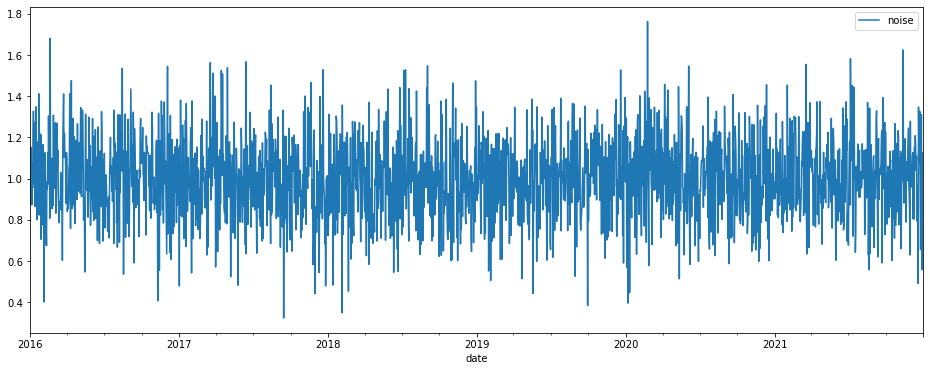

In [29]:
df_noise.plot(y="noise", x="date", figsize=(16,6))

### Additive Model 

In [30]:
df_combination = pd.DataFrame(columns=['date', 'Sum_TSN'])
df_combination.date=series
#df_combination.Sum_TS =df_season["sin"] + df_month["sinM"] + df2["trend"] + df_event['event'] + df_outlier['outlier']
df_combination.Sum_TSN = df_season["Yearly"] + df_month["Monthly"] + df2["trendN"]  + df_outlier['outlier'] + df_noise['noise']
df_combination.head()


,date,Sum_TSN
0,2016-01-01,5.025769
1,2016-01-02,4.867396
2,2016-01-03,5.155589
3,2016-01-04,5.068561
4,2016-01-05,3.911258


<AxesSubplot:xlabel='date'>

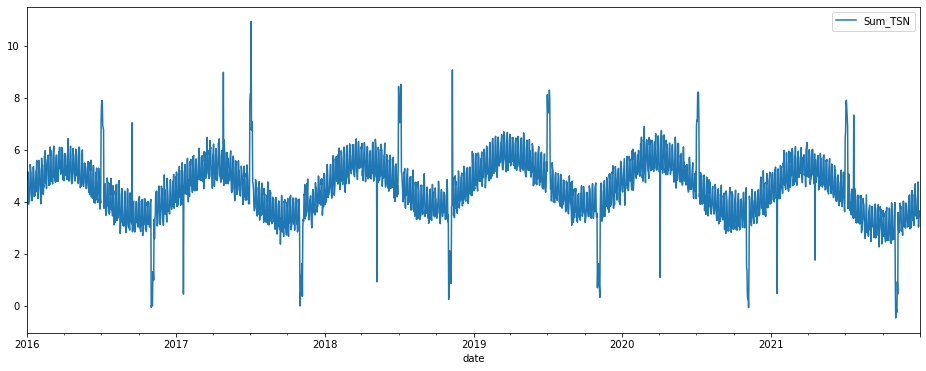

In [31]:
df_combination.plot(y="Sum_TSN", x="date", figsize=(16,6))

(17532.0, 17896.0)

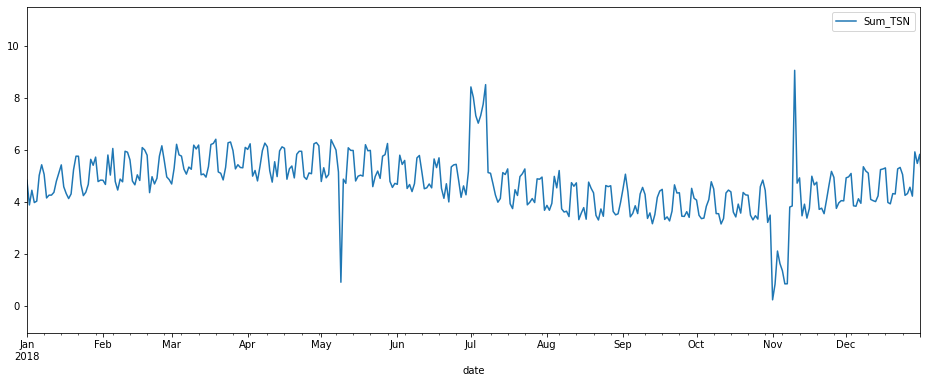

In [32]:
df_combination.plot(y="Sum_TSN", x="date", figsize=(16,6))
plt.xlim('2018-01-01','2018-12-31')

## normlize

        date   Sum_TSN
0 2016-01-01  0.481635
1 2016-01-02  0.467745
2 2016-01-03   0.49302
3 2016-01-04  0.485388
4 2016-01-05  0.383887


<AxesSubplot:xlabel='date'>

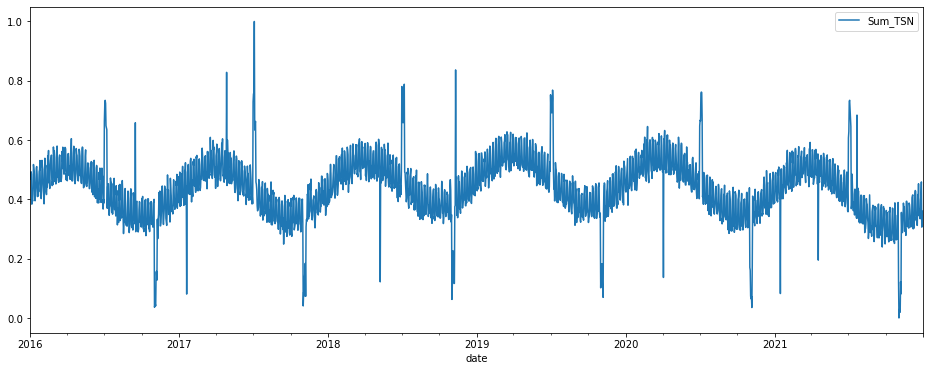

In [33]:
df_combination['Sum_TSN'] = (df_combination['Sum_TSN'] - df_combination['Sum_TSN'].min()) / (df_combination['Sum_TSN'].max() - df_combination['Sum_TSN'].min())
print(df_combination.head())
df_combination.plot(y="Sum_TSN", x="date", figsize=(16,6))

In [34]:
df_combination.to_csv("series4_weekly_normalized.csv")

# Multiplicative Model

In [35]:
df_multiplicative = pd.DataFrame(columns=['date', 'Sum_TSN'])
df_multiplicative.date=series
#df_multiplicative.Sum_TS = df2["trend"] + df_season["sin"] * df2["trend"] + df_month["sinM"] * df2["trend"] + df_event['event'] + df_outlier['outlier'] 
df_multiplicative.Sum_TSN = df2["trendN"] + df_season["Yearly"] * df2["trendN"] + df_month["Monthly"] * df2["trendN"]  +  df_outlier['outlier'] + df_noise['noise'] 

df_multiplicative.head()

,date,Sum_TSN
0,2016-01-01,6.201858
1,2016-01-02,6.051578
2,2016-01-03,6.34786
3,2016-01-04,6.268917
4,2016-01-05,4.649264


<AxesSubplot:xlabel='date'>

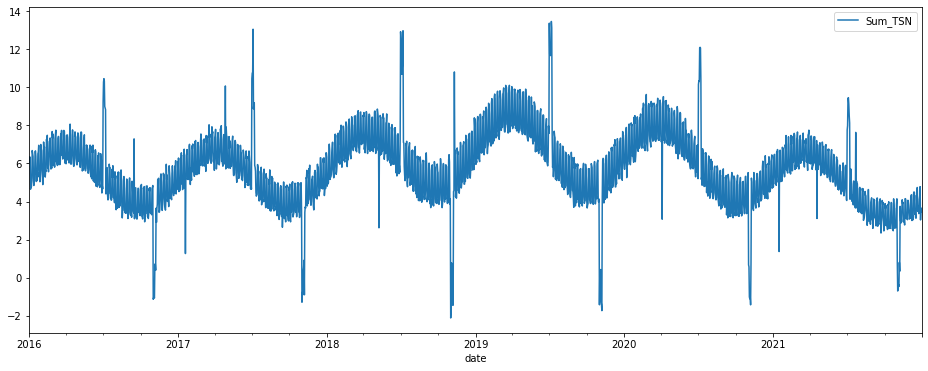

In [36]:
df_multiplicative.plot(y="Sum_TSN", x="date", figsize=(16,6))

In [38]:
df_multiplicative.to_csv("series7_weekly_normalized.csv")

In [39]:
df_true = pd.DataFrame(columns=['date', 'trueYaddN', 'trueYmultN','trueYearly','trueYearlyN','trueMonthly', 'trueMonthlyN', 'trueTrend','trueTrendN', 'trueNoise'])

df_true.date = series 

# additive und multiplicative Version der Zeitreihe (normalisiert)
df_true.trueYaddN = df_combination['Sum_TSN']
df_true.trueYmultN=df_multiplicative['Sum_TSN']

# Season. jährlich
df_true.trueYearly = df_season["Yearly"]
df_true.trueYearlyN = df_season["YearlyN"]

# Season. monatlich 
df_true.trueMonthly = df_month["Monthly"]
df_true.trueMonthlyN = df_month["MonthlyN"]

# Trend 
df_true.trueTrend=df2["trend"]
df_true.trueTrendN=df2["trendN"]

df_true.trueNoise = df_noise['noise']

df_true.head()

,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise
0,2016-01-01,0.481635,6.201858,1.000000,0.561898,1.5,1.0,-0.11,1.470435,1.055334
1,2016-01-02,0.467745,6.051578,1.017213,0.564405,1.5,1.0,-0.24,1.470434,0.879749
2,2016-01-03,0.49302,6.34786,1.034422,0.566911,1.5,1.0,-0.39,1.470431,1.150736
3,2016-01-04,0.485388,6.268917,1.051620,0.569415,1.5,1.0,-0.56,1.470429,1.046512
4,2016-01-05,0.383887,4.649264,1.068802,0.571917,0.5,0.0,-0.75,1.470426,0.872029


<AxesSubplot:xlabel='date'>

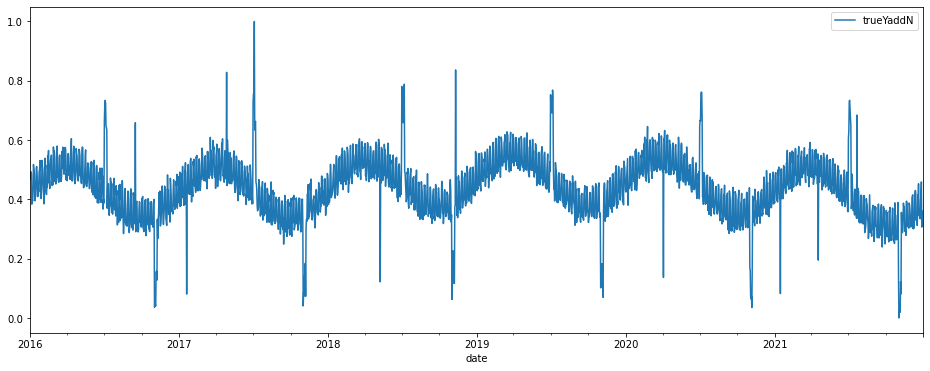

In [40]:
df_true.plot(y="trueYaddN", x="date", figsize=(16,6))

In [41]:
df_true.to_csv("series4_weekly_complete.csv",index=False)